In [1]:
rm(list=ls())
options(width=200, repr.plot.width=11, repr.plot.height=7) 

# Cvičení 8: Volba modelu

Uvažujme obecný regresní model $$Y=\mathbf{X}\beta+\varepsilon.$$

Chceme zjistit:
- zda model vystihuje data dobře
- které z regresorů jsou pro model přínosné a které se naopak dají vynechat
- jak výstupy modelu prakticky interpretovat.

Často jdou proti sobě požadavky mít model:
- co nejpřesnější
- co nejsnadněji interpretovatelný.

Probereme několik možností zhodnocení těchto požadavků.

V tomto cvičení se budeme zabývat porovnáváním regresních modelů s různými vysvětlujícími proměnnými.

**Dataset:**

Stáhněte si soubor https://courses.fit.cvut.cz/BI-PRS/tutorials/files/Data/IchsN.RData do pracovního adresáře.

Načtěte data ze studie _IchsN_, týkající se pacientů s vysokým krevním tlakem.

In [2]:
load("IchsN.RData")

Data můžeme připojit, abychom měli v paměti jednotlivé sloupce rovnou a nemuseli se odvolávat na příslušný data.frame.

Při tomto postupu je potřeba dát pozor, aby se proměnné nepomíchaly.

In [3]:
attach(IchsN)
## mělo by být po skončení práce následováno příkazem detach

 Prozkoumejme základní charakteristiky datového souboru.

In [4]:
summary(IchsN)

     vyska            hmot            syst           diast        Rchol        vek        Vzdel       bmi          Kurak    
 Min.   :160.0   Min.   : 60.0   Min.   :100.0   Min.   : 50.00   0:135   Min.   :45.00   1:65   Min.   :20.34   FALSE: 58  
 1st Qu.:172.0   1st Qu.: 74.5   1st Qu.:120.0   1st Qu.: 80.00   1: 32   1st Qu.:46.00   2:61   1st Qu.:24.19   TRUE :109  
 Median :176.0   Median : 82.0   Median :130.0   Median : 82.00           Median :47.00   3:41   Median :26.09              
 Mean   :176.2   Mean   : 81.8   Mean   :131.7   Mean   : 84.44           Mean   :47.05          Mean   :26.31              
 3rd Qu.:180.0   3rd Qu.: 87.0   3rd Qu.:140.0   3rd Qu.: 90.00           3rd Qu.:48.00          3rd Qu.:28.08              
 Max.   :193.0   Max.   :120.0   Max.   :200.0   Max.   :120.00           Max.   :49.00          Max.   :36.23              

Datový soubor má několik sloupců, nás bude zajímat zejména vysvětlovaná proměnná

- `syst` - systolický tlak

a regresory

- `bmi` - body mass index
- `Rchol` - zvýšený cholesterol 1/0
- `vek` - věk pacienta
- `Vzdel` - dosažené vzdělání s úrovněmi 1,2,3
- `Kurak` - logická proměnná True/False

Chceme zjistit, zda a jak závisí systolický tlak na jednotlivých regresorech.

## Základní přehled

Podívejme se nejdřív na závislost na každé z proměnných zvlášť.

**Spojité proměnné**

Vykreslíme graf závislosti proměnných na sobě a proložíme regresní přímku získanou metodou nejmenších čtverců.

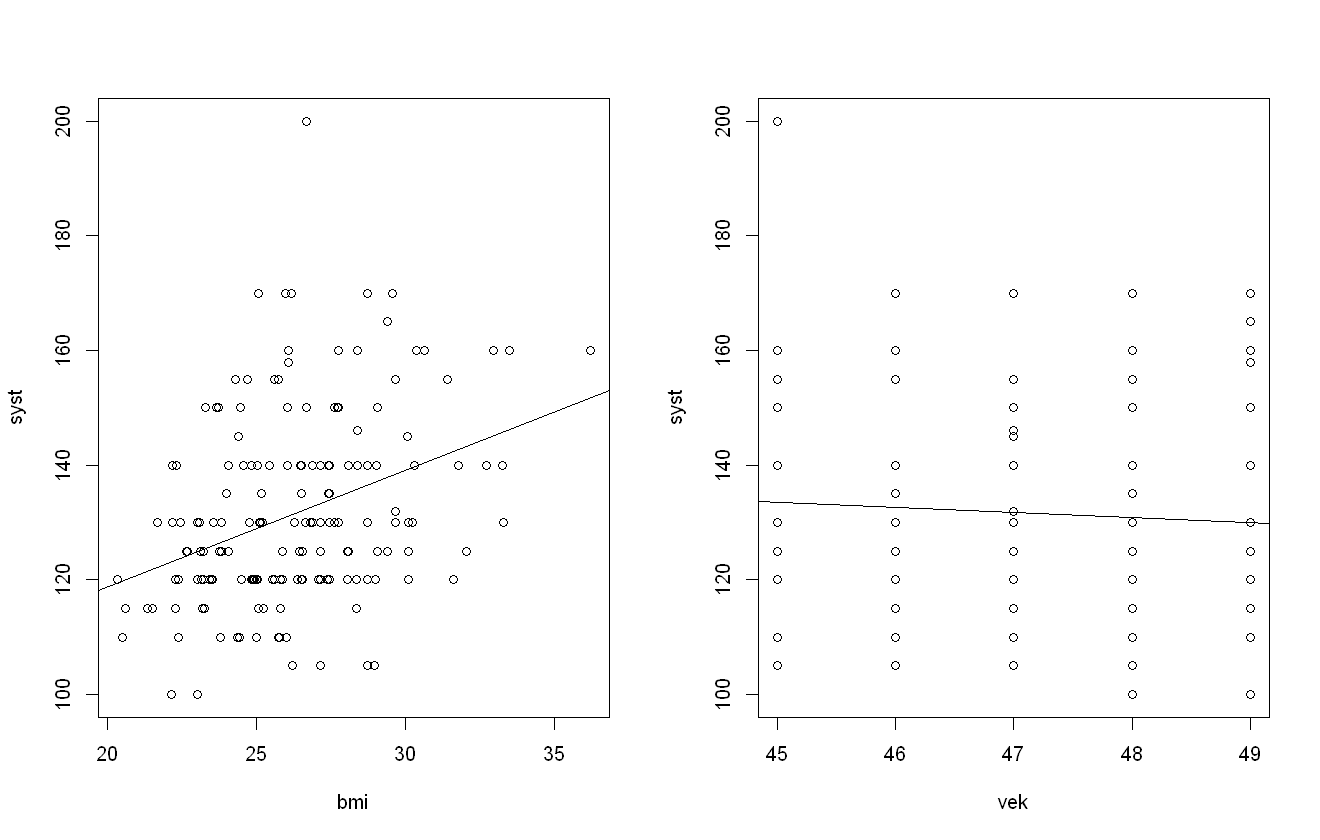

In [5]:
par(mfrow=c(1,2))
## Zavislost tlaku na bmi:
plot(syst~bmi)
abline(lm(syst~bmi))
## Zavislost tlaku na veku:
plot(syst~vek)
abline(lm(syst~vek))

Zdá se, že systolický tlak:
- roste s bmi
- mírně klesá s věkem

**Faktorové proměnné**:

Vykreslíme boxploty:

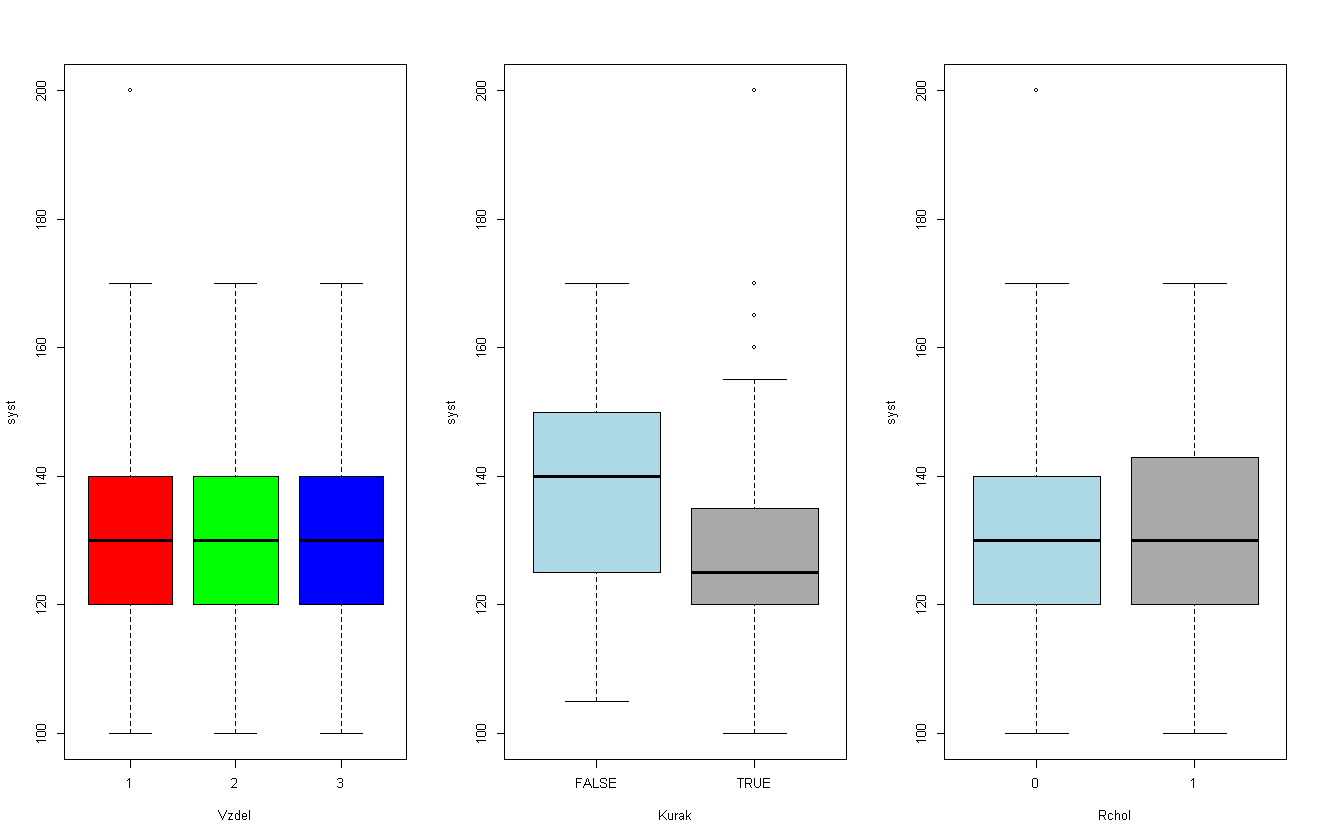

In [6]:
par(mfrow=c(1,3))
boxplot(syst~Vzdel,col=c("red","green","blue"))
boxplot(syst~Kurak,col=c("lightblue","darkgrey"))
boxplot(syst~Rchol,col=c("lightblue","darkgrey"))

Zdá se, že systolický tlak:
- na vzdělání nezávisí,
- na cholesterolu patrně také ne
- je u kuřáků nižší.

## Signifikance regresorů

Uvažujme regresní model s $n$ pozorováními a $k$ regresory. Parametry odhadneme metodou nejmenších čtverců. Pomocí Studentova t-rozdělení můžeme testovat, jestli se skutečné hodnoty regresních koeficientů významně liší od nuly.

Statistika testu, zda $\beta_i=0$, má tvar
$$T_i = \frac{b_i}{\sqrt{s^2 \xi_{ii}}} \sim t_{n-k},$$
kde $\xi_{ii}$ je $i-$tý diagonální prvek $(\mathbf X^T\mathbf X)^{-1}$ a $s^2 = S_e/(n-k-1)$.

Hodnoty odhadů parametrů, směrodatné odchylky, t-statistiky a p-hodnoty příslušných testů nulovosti získáme aplikováním `summary` na nafitovaný regresní model `lm`.

Uvažujme model `fit_all`, ve kterém budou všechny proměnné bez interakcí, tedy 

$$\text{syst}_i=\beta_0+\text{vyska}_i\cdot\beta_\text{vyska}+ \text{kurak}_i\cdot\beta_\text{Kurak}+\text{vek}_i\cdot\beta_\text{vek}+\text{vzdel}_i\cdot\beta_\text{vzdel}+\text{rchol}_i\cdot\beta_\text{rchol}+\epsilon_i$$

In [7]:
fit_all=lm(syst~vyska+vek+Kurak+Vzdel+Rchol)
summary(fit_all)


Call:
lm(formula = syst ~ vyska + vek + Kurak + Vzdel + Rchol)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.109 -10.770  -2.408   8.532  69.354 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 165.9080    59.8293   2.773 0.006214 ** 
vyska         0.1190     0.2156   0.552 0.581729    
vek          -0.9636     0.9473  -1.017 0.310577    
KurakTRUE   -11.1748     2.8037  -3.986 0.000102 ***
Vzdel2       -4.2724     3.0586  -1.397 0.164388    
Vzdel3       -3.7893     3.4457  -1.100 0.273106    
Rchol1       -0.5358     3.3124  -0.162 0.871701    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.3 on 160 degrees of freedom
Multiple R-squared:  0.1001,	Adjusted R-squared:  0.06636 
F-statistic: 2.966 on 6 and 160 DF,  p-value: 0.008979


Vidíme, že kromě absolutního členu a vlivu kouření jsou všechny ostatní regresory nevýznamné.

* Nevýznamnost musíme interpretovat z hlediska každého z regresorů zvlášť - když ho z původního modelu vynecháme, nic se nestane.
* Nevíme, co se stane, kdybychom vynechali všechny nevýznamné regresory dohromady.

## Koeficient determinace

Z dřívějška víme, že podíl variablity v datech vysvětlený modelem můžeme získat pomocí obyčeného a adjustovaného koeficientu determinace:
$$
R^2 = 1 - \frac{S_e}{S_T}\quad {a}\quad R_{\text{adj}}^2 = 1 - \frac{\frac{S_e}{n-k-1}}{\frac{S_T}{n-1}},
$$
kde jsme použili
$$\begin{aligned}
S_T&=\sum_i(Y_{i}-\bar Y_{\bullet})^2\qquad\text{celkový součet čtverců},\\
S_e&=\sum_i(Y_{i}-\mathbf{X}_i\mathbf{\hat\beta})^2\qquad\text{reziduální součet čtverců}.
\end{aligned}$$

- Čím blíž jedné, tím přesnější model.  
- Máme-li dva nebo více modelů, můžeme jejich $R^2$ porovnat.
- Neposkytují statistické zhodnocení, zda je jeden model významně lepší než jiný.

**Příklad**

Uvažujme kromě předchozího modelu ještě model `fit_vk`, kde uvažujeme jen vliv výšky a kouření.

$$\text{syst}_i=\beta_0+\text{vyska}_i\cdot\beta_\text{vyska}+ \text{kurak}_i\cdot\beta_\text{Kurak}+\epsilon_i$$

In [8]:
fit_vk=lm(syst~vyska+Kurak)
summary(fit_vk)


Call:
lm(formula = syst ~ vyska + Kurak)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.504  -8.628  -2.706  11.251  73.019 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.09181   37.17953   3.338 0.001046 ** 
vyska         0.08051    0.21121   0.381 0.703546    
KurakTRUE   -10.15382    2.64675  -3.836 0.000178 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.26 on 164 degrees of freedom
Multiple R-squared:  0.08248,	Adjusted R-squared:  0.07129 
F-statistic: 7.371 on 2 and 164 DF,  p-value: 0.0008603


- Obyčejný koeficient determinace `Multiple R-squared` je 0.0824,
- adjustovaný koeficient determinace `Adjusted R-squared` je 0.07129.
Podíl variability vysvětlený modelem není příliš vysoký.

Porovnáme s koeficienty determinace původního modelu `fit_all`:

In [9]:
summary(fit_all)$r.squared
summary(fit_all)$adj.r.squared

[1] 0.1001017

[1] 0.06635551

- Obyčejný koeficient determinace `Multiple R-squared` je 0.1001, tedy o něco vyšší, než u menšího modelu,
- adjustovaný koeficient determinace `Adjusted R-squared` je 0.06635, tedy dokonce o něco nižší.

- Adjustovaný koeficient determinace částečně zohledňuje počet proměnných.
- Osekaný model nevypadá zásadně horší, než model širší.

---

<font color="blue">**Nyní je čas udělat úkoly 1.a-e) v druhém notebooku**</font>

---

## Model vs. podmodel

Uvažujme regresní model $\mathbf Y=\mathbf{X}\beta+\varepsilon$ s $n$ pozorováními, absolutním členem a $k$ regresory.

Uvažujme dále jeho **podmodel** s $r$ regresory ($r<k$), tedy takový, kde
- oproti původnímu z matice $\mathbf{X}$ vynecháme $k-r$ sloupců, čímž vznikne matice $\mathbf{X}_p$
- z vektoru $\beta$ vynecháme příslušných $k-r$ prvků

V podmodelu odhadneme regresní koeficienty metodou nejmenších čtverců a spočteme příslušný reziduální součet čtverců:
$$S_p=\sum_{i=1}^n(Y_i-\mathbf{X}_{pi}{\hat\beta}_{p})^2.$$

Podmodel si můžeme také představit jako situaci, kdy jsou všechny ostatní regresní koeficienty v původním modelu nulové. Tuto hypotézu budeme chtít testovat. Ukáže se, že za předpokladu normality odchylek má při platnosti nulové hypotézy statistika
$$F=\frac{(S_p-S_e)/(k-r)}{S_e/(n-k-1)}.$$
Fisherovo-Snedecorovo F-rozdělení s $k-r$ a $n-k-1$ stupni volnosti. p-hodnota testu pak udává pravděpodobnost, že F-rozdělení bude vyšší než spočítaná F-statistika. Test zavoláme příkazem `anova` na podmodel a původní model. 

**Příklad:**

Testujme, zda je možné redukovat původní model `fit_all` na podmodel `fit_vk`, zahrnující pouze vliv výšky a kouření.

Zkoumáme tak, jestli je rozdíl v reziduálních součtech čtverců významně velký, tedy zda širší model vnáší 

In [10]:
anova(fit_vk,fit_all)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,43341.87,NA,NA,NA,NA
2,160,42509.27,4,832.6011,0.7834538,0.5374854


Získáme reziduální součty čtverců $S_e=42509.27$ $S_p=43341.87$, jejich rozdíl $832.6011$.

p-hodnota F-testu hypotézy $H_0:$ $\beta_\text{vek}=\beta_\text{Rchol} =\beta_\text{Vzdel}=0$ je $0.537$, tedy nulovost nezamítáme.

Zkusme v širším modelu `fit_all` přidat i interakce a otestovat, jestli přináší významné zlepšení predikce:

In [11]:
fit_int=lm(syst~vyska*vek*Kurak*Vzdel*Rchol)
summary(fit_int)


Call:
lm(formula = syst ~ vyska * vek * Kurak * Vzdel * Rchol)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.958  -9.063  -0.291   6.690  52.611 

Coefficients: (3 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)
(Intercept)                       -1.623e+03  6.441e+03  -0.252    0.802
vyska                              9.202e+00  3.667e+01   0.251    0.802
vek                                3.382e+01  1.384e+02   0.244    0.807
KurakTRUE                          5.311e+03  6.803e+03   0.781    0.437
Vzdel2                            -3.663e+03  8.080e+03  -0.453    0.651
Vzdel3                             3.704e+03  8.539e+03   0.434    0.665
Rchol1                             2.379e+04  7.277e+04   0.327    0.744
vyska:vek                         -1.762e-01  7.887e-01  -0.223    0.824
vyska:KurakTRUE                   -2.951e+01  3.875e+01  -0.762    0.448
vek:KurakTRUE                     -1.080e+02  1.460e+02 

Ukáže se, že u některých kombinací interakcí už v datech není dostatek pozorování, aby bylo možné odhadnout parametry. Nabízí se několik možností, např.:
- Shluknout některé vícefaktorové regresory do méně tříd.
- Vynechat některé interakce.

Zde např. zanedbáme interakce s vlivem vzdělání

In [12]:
fit_int=lm(syst~vyska*vek*Kurak*Rchol+Vzdel)
summary(fit_int)


Call:
lm(formula = syst ~ vyska * vek * Kurak * Rchol + Vzdel)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.081 -10.027  -1.712   9.449  63.317 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)
(Intercept)                 3.842e-03  3.031e+03   0.000    1.000
vyska                       7.843e-01  1.717e+01   0.046    0.964
vek                         8.921e-01  6.492e+01   0.014    0.989
KurakTRUE                   1.776e+03  3.463e+03   0.513    0.609
Rchol1                     -1.379e+03  6.441e+03  -0.214    0.831
Vzdel2                     -2.570e+00  3.231e+00  -0.795    0.428
Vzdel3                     -2.943e+00  3.654e+00  -0.806    0.422
vyska:vek                  -4.811e-03  3.678e-01  -0.013    0.990
vyska:KurakTRUE            -9.973e+00  1.959e+01  -0.509    0.611
vek:KurakTRUE              -3.596e+01  7.406e+01  -0.486    0.628
vyska:Rchol1                8.163e+00  3.655e+01   0.223    0.824
vek:Rchol1                  3.442e+

Porovnáme model s interakcemi s modelem bez nich:

In [13]:
anova(fit_all,fit_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,160,42509.27,NA,NA,NA,NA
2,149,40280.65,11,2228.614,0.7494316,0.6895413


Mezi modely není statisticky významný rozdíl.

Můžeme porovnat model s interakcemi s osekaným modelem:

In [14]:
anova(fit_vk,fit_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,43341.87,NA,NA,NA,NA
2,149,40280.65,15,3061.216,0.7549052,0.7250171


Opět, podle p-hodnoty mezi modely není statisticky významný rozdíl.

## Věrohodnostní přístupy

Za předpokladu normality odchylek můžeme spočítat věrohodnost dat, tedy jejich sdruženou hustotu:
$$L(\beta,\sigma^2)=\prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-\mathbf X_i\beta)^2}{2\sigma^2}}=\frac{1}{(\sqrt{2\pi\sigma^2})^n}e^{-\sum_{i=1}^n\frac{(y_i-\mathbf X_i\beta)^2}{2\sigma^2}}.$$
Logaritmická věrohodnostní funkce pak má tvar
$$l(\beta,\sigma^2)=\ln \frac{1}{(\sqrt{2\pi\sigma^2})^n}e^{-\sum_{i=1}^n\frac{(y_i-\mathbf X_i\beta)^2}{2\sigma^2}}
=-\frac{n}{2}\ln{2\pi\sigma^2}-\frac{1}{{2\sigma^2}}\sum_{i=1}^n(y_i-\mathbf X_i\beta)^2.$$
Ukáže se, že:
- Kdybychom hledali odhady parametrů modelu maximalizací věrohodnosti, získáme pro $\beta$ identický odhad jako metodou nejmenších čtverců. Odhad rozptylu odchylek bude $\hat\sigma^2=\frac{S_e}{n}.$
- Když bychom uvažovali model s $k$ regresory a jeho podmodel s $r$ regresory a odhadli parametry metodou maximální věrohodnosti v obou z nich zvlášť, pak statistika $$LR=2(l(\hat\beta,\hat\sigma^2)-l(\hat\beta_p,\hat\sigma_p^2))$$ má za platnosti podmodelu chí-kvadrát rozdělení s $k-r$ stupni volnosti. 

Můžeme tak opět testovat, zda můžeme původní model redukovat na podmodel - tentokrát podle toho, zda je věrohodnost širšího modelu významně vyšší. Tomuto testu se říká **test poměrem věrohodností**.

**Příklad:**
Testujme, zda je možné redukovat model závislosti krevního tlaku se všemi proměnnými na podmodel jen s vlivem výšky a kouření.

Test získáme opět dosazením obou nafitovaných modelů do funkce `anova`, jen musíme specifikovat typ testu, tentokrát `test="Chisq"`:

In [15]:
anova(fit_vk,fit_all,test="Chisq")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,43341.87,NA,NA,NA
2,160,42509.27,4,832.6011,0.5356868


p-hodnota je $0.5357$, takže opět nezamítáme hypotézu, že je možné širší model redukovat na podmodel.

Můžeme testovat jednodušší model i proti modelu s interakcemi. Opět vidíme, že širší model nic zásadního nepřináší:

In [16]:
anova(fit_vk,fit_int,test="Chisq")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,43341.87,NA,NA,NA
2,149,40280.65,15,3061.216,0.7293374


---

<font color="blue">**Nyní je čas udělat úkoly 2.a-d) v druhém notebooku**</font>

---

## Kritéria a sekvenční přístupy

### Informační kritéria

Logaritmické věrohodnosti využívá **Akaikeho informační kritérium** (AIC) a **Bayesovské informační kritérium** (BIC) se základními myšlenkami:
- Čím vyšší věrohodnost, tím lépe model vystihuje data
- Čím méně parametrů, tím lépe je model interpretovatelný.
Kritéria byla navržena ve formě
$$\begin{aligned}AIC&=-2l({\hat\theta})+2q,\\
BIC&=-2l({\hat\theta})+q\ln n,\end{aligned}$$
kde $q$ je počet odhadnutých parametrů. V modelu s $k$ regresory je $q=k+2$, protože uvažujeme navíc absolutní člen a rozptyl.

Čím nižší hodnota kritéria, tím šikovnější model

**Příklad:**

Porovnejme Akaikeho a Bayesovské informační kritérium předchozích modelů závislosti tlaku na dalších proměnných.

Akaikeho kritérium získáme snadno příkazem `AIC` na nafitovaný lineární regresní model, Bayesovské kritérium identicky pomocí `BIC`:

In [17]:
AIC(fit_vk)
AIC(fit_all)
AIC(fit_int)

[1] 1410.259

[1] 1415.019

[1] 1428.026

In [18]:
BIC(fit_vk)
BIC(fit_all)
BIC(fit_int)

[1] 1422.73

[1] 1439.963

[1] 1487.268

Podle obou kritérií je model obsahující jen vliv výšky a kouření nejšikovnější.

#### Sekvenční kritéria

**Vzestupně:**

Můžeme uvažovat konkrétní základní model, k němu přidávat postupně jednotlivé proměnné a zkoumat, zda je širší model významně lepší. Použijeme funkci `add1`, dosadíme základní model a specifikujeme množinu dalších proměnných, ze kterých vybírat. Získáme reziduální součet čtverců a AIC. Pokud specifikujeme typ testu (`F` nebo `Chisq`), tak i p-hodnotu testu model-podmodel.

Zkusme začít u modelu krevního tlaku pouze s absolutním členem a přidávat jednotlivé proměnné. Vidíme, že jediný významný regresor je kuřáctví.

In [19]:
add1(lm(syst~1),~vyska+vek+Kurak+Vzdel+Rchol,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,47237.86,944.7078,NA,NA
vyska,1,6.452248,47231.40,946.6850,0.02254053,0.8808414427
vek,1,236.748644,47001.11,945.8688,0.83111927,0.3632790837
Kurak,1,3857.584222,43380.27,932.4810,14.67260038,0.0001814295
Vzdel,2,194.075523,47043.78,948.0203,0.33828473,0.7134885688
Rchol,1,4.774806,47233.08,946.6910,0.01667990,0.8973957181


**Sestupně**

Vyjdeme ze složitějšího modelu, ze kterého budeme postupně jednotlivé regresory odstraňovat pomocí funkce `drop1`:

In [20]:
drop1(lm(syst~vyska+vek+Kurak+Vzdel+Rchol),test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,42509.27,939.0938,NA,NA
vyska,1,80.950226,42590.22,937.4115,0.30468736,0.5817288545
vek,1,274.920555,42784.19,938.1703,1.03476940,0.3105768199
Kurak,1,4220.532777,46729.80,952.9020,15.88560078,0.0001020328
Vzdel,2,584.140310,43093.41,937.3730,1.09931853,0.3356004765
Rchol,1,6.951737,42516.22,937.1211,0.02616554,0.8717007809


Opět vidíme, že pouze kuřáctví má významný vliv.

**Postupný výběr**

Můžeme také specifikovat minimální a maximální model a nechat software procházet proměnné postupně. Pokud narazí na nějakou, jejíž přidání sníží AIC, zařadí ji do modelu a pokračuje dál, než dojde k optimální verzi. 

Sekvenční postup zavoláme příkazem `step`, přičemž specifikujeme počáteční model a jeho minimální a maximální rozsah.

In [21]:
step(lm(syst~1,data=warpbreaks),scope=list(lower=~1,upper=~vyska*vek*Kurak*Rchol+Vzdel))

Start:  AIC=944.71
syst ~ 1

        Df Sum of Sq   RSS    AIC
+ Kurak  1    3857.6 43380 932.48
<none>               47238 944.71
+ vek    1     236.7 47001 945.87
+ vyska  1       6.5 47231 946.69
+ Rchol  1       4.8 47233 946.69
+ Vzdel  2     194.1 47044 948.02

Step:  AIC=932.48
syst ~ Kurak

        Df Sum of Sq   RSS    AIC
<none>               43380 932.48
+ vek    1     206.1 43174 933.69
+ Rchol  1      57.9 43322 934.26
+ vyska  1      38.4 43342 934.33
+ Vzdel  2     486.2 42894 934.60
- Kurak  1    3857.6 47238 944.71



Call:
lm(formula = syst ~ Kurak, data = warpbreaks)

Coefficients:
(Intercept)    KurakTRUE  
     138.24       -10.09  


Získáme stejný výsledek.

In [22]:
## nakonec zapomeneme data IchsN
detach(IchsN)

---

<font color="blue">**Nyní je čas udělat úkoly 3.a-c) v druhém notebooku**</font>

---